# About The DataSet
The dataset and working belongs to getting started in NLP
Content:- The dataset contains email received. The dataset contains two columns Text and Spam.

v2 :- Text / Email received.

v1:- Whether the email received is spam/ham(legitimate)
Class 0: HAM (Legitimate)
Class 1: SPAM

Goal:- Using NLP we have to build a model for future mails that can classify into spam/ham

In [1]:
import pandas as pd
df = pd.read_csv('D:\KAGGLE FILES\spam.csv', encoding = 'cp1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df = df.iloc[::,[0,1]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.size

11144

#### I want to give some relevant names to my columns

In [5]:
df = df.rename(columns = {'v1':'label' , 'v2':'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Categoric into Numeric

spam = 1

ham = 0

In [8]:
df.label.replace({'spam':1 , 'ham':0},inplace = True) 

In [9]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [10]:
# when ever you doing NLP convert all values into lower case or upper case ..because python is case sensitive
# data preparation starts now
df.message = df.message.str.lower()
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [11]:
import nltk

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
len(stopwords.words('english'))

179

In [15]:
import string
string.punctuation  # only a special characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### we will remove the stopwords , punctuation , tokenization (assign id to each word)
### Tokenization means = split()
#### create a TDM the do sampling build the model do the prediction

In [16]:
def text_process(mess):
    '''
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc =  ''.join(nopunc)
    return[word for word in nopunc.split() if word not in stopwords.words('english')]

In [17]:
df.message.apply(text_process) # it is not save

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

#### to save the changes we use count vectorizer and save it to our new variable
#### countvectorizer tells hows many time my words is repeating in the dataset

In [18]:
after_transformation = CountVectorizer(analyzer = text_process).fit(df['message'])
after_transformation.vocabulary

<IPython.core.display.Javascript object>

In [19]:
len(after_transformation.vocabulary_)

9431

In [20]:
tdm_spamdata = after_transformation.transform(df['message'])
tdm_spamdata # TDM will act as my X values

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [21]:
type(tdm_spamdata)

scipy.sparse.csr.csr_matrix

In [22]:
tdm_spamdata.shape

(5572, 9431)

In [23]:
abc = tdm_spamdata.toarray()
abc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
df1 = pd.DataFrame(abc)
df1  # 0 and 1

,0,1,2,3,4,5,6,7,8,9,...,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(tdm_spamdata , df.label , test_size=.2)

In [26]:
train_X.shape

(4457, 9431)

In [27]:
test_X.shape

(1115, 9431)

# Model Building  

#### some rules
##### Accuracy : higher the accuracy better the model
##### TPR(recalll) : higher the recall better the model
##### FPR lower the fpr better the model
##### Precision : higher the precision better the model
##### F1 : Higher the F! better the model

In [28]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

As we can see that this data is huge imbalanced so we need to balanced the data with the help of stratified sampling . i can use under or oversampling also but we can see that the data of 1 and 0 is approx 1:7

In [29]:
747/(4825+747)

0.13406317300789664

In [30]:
1-0.13406317300789664

0.8659368269921034

In [31]:
4825/747

6.459170013386881

In [32]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(tdm_spamdata , df.label ,stratify=df.label, test_size=.2)

In [33]:
train_X.shape

(4457, 9431)

In [35]:
train_y.value_counts()

0    3859
1     598
Name: label, dtype: int64

In [36]:
test_y.value_counts()

0    966
1    149
Name: label, dtype: int64

In [37]:
598/3859

0.1549624254988339

In [38]:
149/966

0.15424430641821946

#### so we can see that ratio between 1 and 0 in train_y and test_y is same ..it means the problem of data imbalanced is solve

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import accuracy_score,precision_score ,roc_auc_score, recall_score , f1_score , confusion_matrix
confusion_matrix(test_y , pred_y)

array([[963,   3],
       [ 14, 135]], dtype=int64)

In [45]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9847533632286996
recall_score: 0.9060402684563759
precision: 0.9782608695652174
roc_curve: 0.951467339197132
f1_score: 0.9407665505226481


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



<AxesSubplot:>

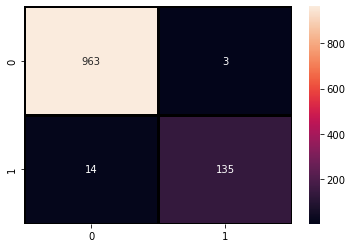

In [56]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y) , 
            annot = True , fmt = 'd' , linecolor = 'k', linewidth = 3 )
# line width = boundary of width
# line color = color of boundary
# fmt = 09.63+e**2 ko 963 me likhta hai

In [57]:
# CROSS VALIDATION OF LOGISTIC REGRESSSION
lr_grid = {'solver':['newton_cg','lbfgs','liblinear','sag','saga'],
          'penalty':['elasticnet','l1','l2']}
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr , param_grid = lr_grid)
grid_lr.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [62]:
grid_lr.best_params_

{'penalty': 'l2', 'solver': 'sag'}

In [63]:
lr = LogisticRegression(penalty = 'l2',solver = 'sag')
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[962,   4],
       [ 15, 134]], dtype=int64)

In [64]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9829596412556054
recall_score: 0.8993288590604027
precision: 0.9710144927536232
roc_curve: 0.9475940361554602
f1_score: 0.9337979094076655


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



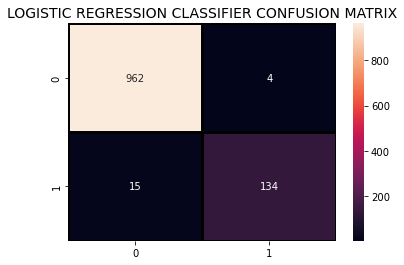

In [65]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# K NEAREST NEIGHBOURS

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[966,   0],
       [103,  46]], dtype=int64)

In [68]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9076233183856502
recall_score: 0.3087248322147651
precision: 1.0
roc_curve: 0.6543624161073825
f1_score: 0.4717948717948718


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       966
           1       1.00      0.31      0.47       149

    accuracy                           0.91      1115
   macro avg       0.95      0.65      0.71      1115
weighted avg       0.92      0.91      0.89      1115



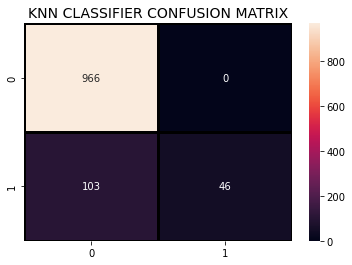

In [69]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [70]:
# CROSS VALIDATION OF KNN
parameter_dict={'n_neighbors':[1,11,21,31,41,51,75,101]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(train_X , train_y)
grid_df.best_params_

{'n_neighbors': 1}

In [75]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[966,   0],
       [ 62,  87]], dtype=int64)

In [76]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9443946188340807
recall_score: 0.5838926174496645
precision: 1.0
roc_curve: 0.7919463087248322
f1_score: 0.7372881355932204


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.58      0.74       149

    accuracy                           0.94      1115
   macro avg       0.97      0.79      0.85      1115
weighted avg       0.95      0.94      0.94      1115



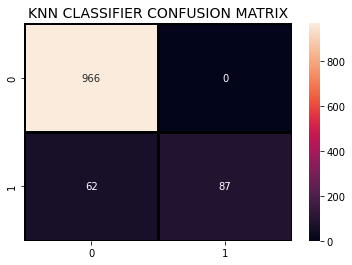

In [77]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# DECISION TREE CLASSIFIER

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[955,  11],
       [ 27, 122]], dtype=int64)

In [79]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9659192825112107
recall_score: 0.8187919463087249
precision: 0.9172932330827067
roc_curve: 0.9037023913738241
f1_score: 0.8652482269503546


In [80]:
# CROSS VALIDATION OF DECISION TREE CLASSIFIER
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [81]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 4}

In [82]:
dt=DecisionTreeClassifier(criterion='gini' , max_depth=30 , min_samples_split=4)
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[953,  13],
       [ 29, 120]], dtype=int64)

In [83]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9623318385650225
recall_score: 0.8053691275167785
precision: 0.9022556390977443
roc_curve: 0.8959557852904803
f1_score: 0.8510638297872339


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.90      0.81      0.85       149

    accuracy                           0.96      1115
   macro avg       0.94      0.90      0.91      1115
weighted avg       0.96      0.96      0.96      1115



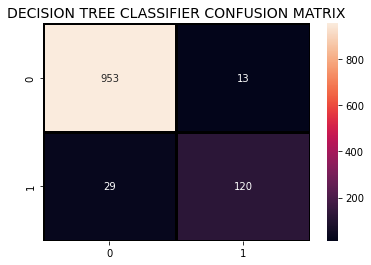

In [84]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# BAGGING CLASSIFIER

In [87]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)
bg.fit(train_X , train_y)
pred_y=bg.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[961,   5],
       [ 26, 123]], dtype=int64)

In [88]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9721973094170404
recall_score: 0.825503355704698
precision: 0.9609375
roc_curve: 0.9101636861339225
f1_score: 0.888086642599278


In [89]:
#CROSS VALIDATION OF BAGGING CLASSIFIER
from sklearn.model_selection import GridSearchCV
param_grid_bagging = {'n_estimators':list(range(1,100,10))}
grid = GridSearchCV(bg , param_grid=param_grid_bagging)
grid.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This prob

GridSearchCV(estimator=BaggingClassifier(n_estimators=100, oob_score=True,
                                         random_state=42),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [90]:
grid.best_params_

{'n_estimators': 91}

In [91]:
bg = BaggingClassifier(n_estimators=91 , bootstrap=True , oob_score=True)
bg.fit(train_X , train_y)
pred_y = bg.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[961,   5],
       [ 28, 121]], dtype=int64)

In [92]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9704035874439462
recall_score: 0.8120805369127517
precision: 0.9603174603174603
roc_curve: 0.9034522767379494
f1_score: 0.8800000000000001


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.81      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



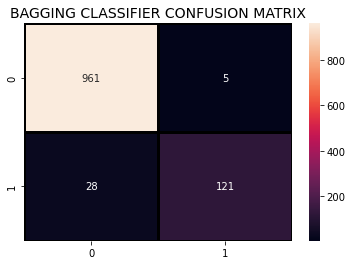

In [93]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# RANDOM FOREST CLASSIFIER

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_X , train_y)
pred_y = rf.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[966,   0],
       [ 26, 123]], dtype=int64)

In [95]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9766816143497757
recall_score: 0.825503355704698
precision: 1.0
roc_curve: 0.912751677852349
f1_score: 0.9044117647058824


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



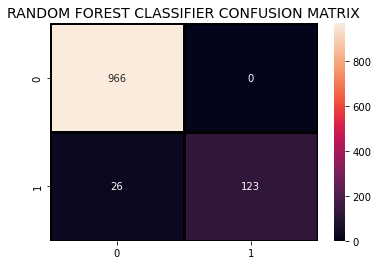

In [96]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [98]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(train_X , train_y)
pred_y=svm.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[966,   0],
       [ 22, 127]], dtype=int64)

In [99]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9802690582959641
recall_score: 0.8523489932885906
precision: 1.0
roc_curve: 0.9261744966442953
f1_score: 0.9202898550724637


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



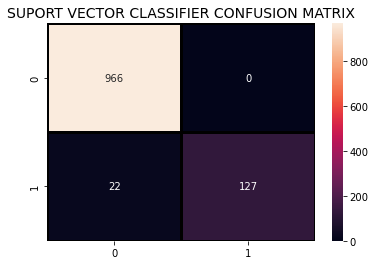

In [100]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [110]:
# CROSS VALIDATION WITH SVC
from sklearn.model_selection import GridSearchCV
param_dict = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'C' : list(range(1,10,1))}
svm_grid = GridSearchCV(svm , param_grid = param_dict)
svm_grid = svm_grid.fit(train_X , train_y)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [111]:
svm= SVC(C=1 , kernel = 'linear')
svm.fit(train_X , train_y)
pred_y=svm.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[965,   1],
       [ 12, 137]], dtype=int64)

In [112]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9883408071748879
recall_score: 0.9194630872483222
precision: 0.9927536231884058
roc_curve: 0.9592139452804759
f1_score: 0.9547038327526132


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



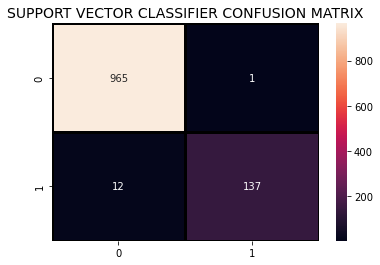

In [113]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

#  VOTING CLASSIFIER

In [119]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([('svm',svm),('lr',lr),('knn',knn),('dt',dt),('rf',rf),('bg',bg)],voting='hard',n_jobs=5)
voting_clf.fit(train_X , train_y)
pred_y=voting_clf.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[965,   1],
       [ 27, 122]], dtype=int64)

In [120]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9748878923766816
recall_score: 0.8187919463087249
precision: 0.991869918699187
roc_curve: 0.908878374810677
f1_score: 0.8970588235294118


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.82      0.90       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



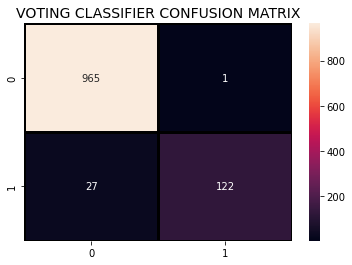

In [121]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("VOTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# XGBOOST CLASSIFIER

In [123]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X , train_y)
pred_y = xgb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[960,   6],
       [ 17, 132]], dtype=int64)

In [124]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.979372197309417
recall_score: 0.8859060402684564
precision: 0.9565217391304348
roc_curve: 0.9398474300721164
f1_score: 0.9198606271777003


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



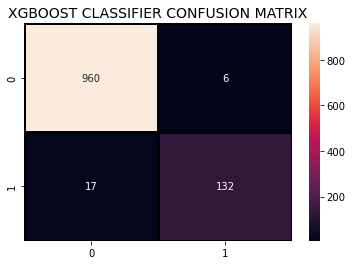

In [125]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# Naive Baised Classifier

In [126]:
# By bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[961,   5],
       [ 25, 124]], dtype=int64)

In [127]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9730941704035875
recall_score: 0.8322147651006712
precision: 0.9612403100775194
roc_curve: 0.9135193908319091
f1_score: 0.8920863309352518


In [129]:
# By MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bnb = MultinomialNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[943,  23],
       [  9, 140]], dtype=int64)

In [130]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9713004484304932
recall_score: 0.9395973154362416
precision: 0.8588957055214724
roc_curve: 0.9578938958133588
f1_score: 0.8974358974358976


In [132]:
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

### To check My Algorithm working good or not

In [146]:
list1 = ['He is a great leader.','He is a terrible leader.']
X_new = after_transformation.transform(list1)
svm.predict(X_new)

array([0, 0], dtype=int64)

# CONCLUSION

## Here we can see that , CROSS VALIDATION  of SUPPORT VECTOR CLASSIFIER shows highest , Accuracy , Precision , Recall and F1 ...so we should go with Cross Validation Of Support Vector Classifier 